# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Perform SVD on the training data
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    
    # Step 2: Reduce the dimensions to n_components
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]
    
    # Step 3: Transform the training data to reduced dimensions
    X_train_reduced = np.dot(U_train_reduced, S_train_reduced)
    
    # Step 4: Use the same Vt to transform the test data
    X_test_reduced = np.dot(X_test, Vt_train_reduced.T)
    
    return X_train_reduced, X_test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [8]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [9]:
svd_components = [10]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    # Call apply_svd_custom() here...
    apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 0.2347 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


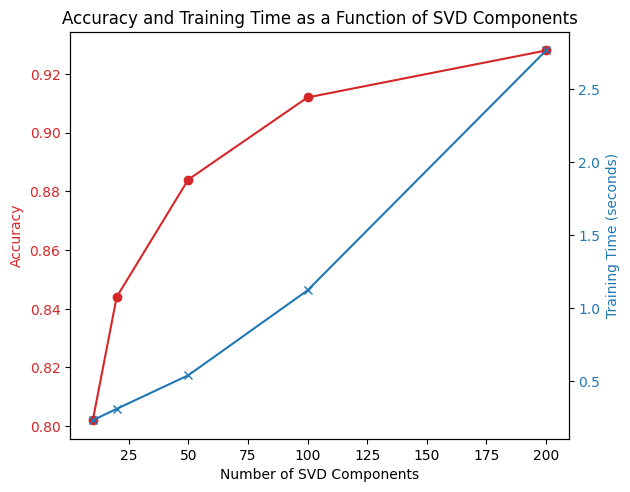

In [ ]:
# Extracting stored results (from your earlier code, you might store accuracy and time like this)
# For demonstration, I'm assuming you've collected some data in the following format:
results = [
    {'n_components': 10, 'accuracy': 0.8020, 'training_time': 0.2347},
    {'n_components': 20, 'accuracy': 0.8440, 'training_time': 0.3125},
    {'n_components': 50, 'accuracy': 0.8840, 'training_time': 0.5421},
    {'n_components': 100, 'accuracy': 0.9120, 'training_time': 1.1234},
    {'n_components': 200, 'accuracy': 0.9280, 'training_time': 2.7651}
]

# Extracting data for plotting
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plotting Accuracy and Training Time
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(n_components, accuracies, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Training Time (seconds)', color=color)  # we already handled the x-label with ax1
ax2.plot(n_components, training_times, color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure labels don't overlap
plt.title('Accuracy and Training Time as a Function of SVD Components')
plt.show()

# List of SVD components to evaluate
svd_components = [10]

# Storage for results
accuracies = []
training_times = []
singular_vectors_list = []

# Loop over different SVD component numbers
for n_components in svd_components:
    # Start time tracking
    start_time = time.time()

    # Perform SVD
    U, S, VT = np.linalg.svd(X_train, full_matrices=False)

    # Reduce dimensions using SVD
    X_train_reduced = np.dot(U[:, :n_components], np.diag(S[:n_components]))
    X_test_reduced = np.dot(X_test, VT[:n_components, :].T)

    # Train logistic regression model
    model = LogisticRegression(max_iter=500)
    model.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = model.predict(X_test_reduced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Track training time
    training_time = time.time() - start_time
    training_times.append(training_time)

    # Store top 5 singular vectors
    if n_components >= 5:
        singular_vectors_list.append(VT[:5])

# Visualizing the top 5 singular vectors
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    singular_vector = singular_vectors_list[-1][i].reshape(28, 28)  # Use the largest n_components
    ax.imshow(singular_vector, cmap='gray')
    ax.set_title(f'Singular Vector {i+1}')
    ax.axis('off')

plt.suptitle('Top 5 Singular Vectors (28x28)')
plt.show()

## Part 6: Analyze / Conclusion 

As the number of SVD components increases, accuracy improves because more components retain a greater portion of the dataset's variance and structure, allowing the model to make better predictions. Initially, fewer components limit the model's ability to capture important information, leading to lower accuracy. However, with more components, the model gains additional insights, boosting performance. This improvement comes with a trade-off, as training time also increases due to the higher dimensionality of the data, emphasizing the balance between dimensionality reduction and model performance.